In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("E:/project EDA/Global_Superstore2.csv", encoding='ISO-8859-1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [12]:
df.isnull().sum().sum()

np.int64(41296)

In [13]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [14]:
df["Customer ID"].duplicated().sum()

np.int64(49700)

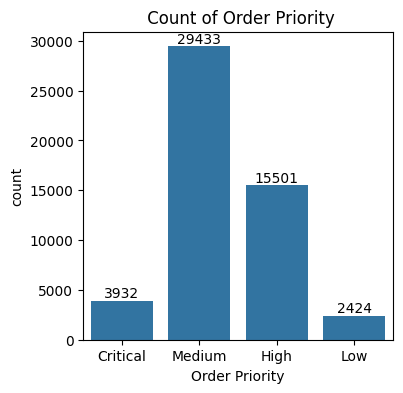

In [15]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Order Priority',data = df)
ax.bar_label(ax.containers[0])
plt.title(" Count of Order Priority")
plt.show() 

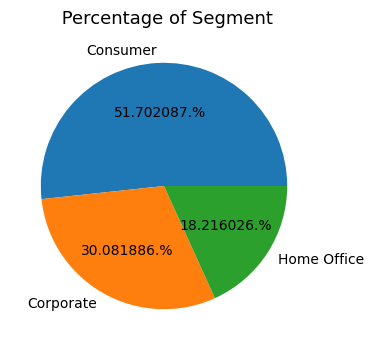

In [16]:
plt.figure(figsize = (4,4))
gb = df.groupby("Segment").agg({'Segment':"count"})
gb
plt.pie(gb['Segment'], labels = gb.index, autopct = "%2f.%%")
plt.title(" Percentage of Segment" , fontsize = 13 )
plt.show()

#from the given pie chart we can conclude that 30.08186% of our corporate have segment out.
Now let's explore the reason behind it 

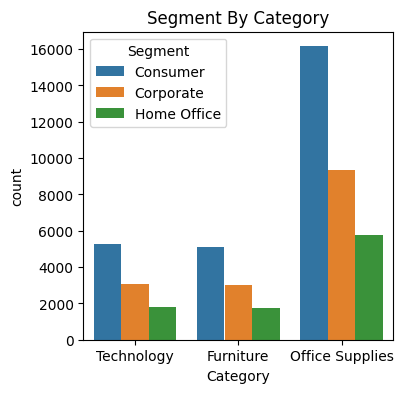

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x = "Category" , data = df , hue = "Segment")
plt.title("Segment By Category")
plt.show()

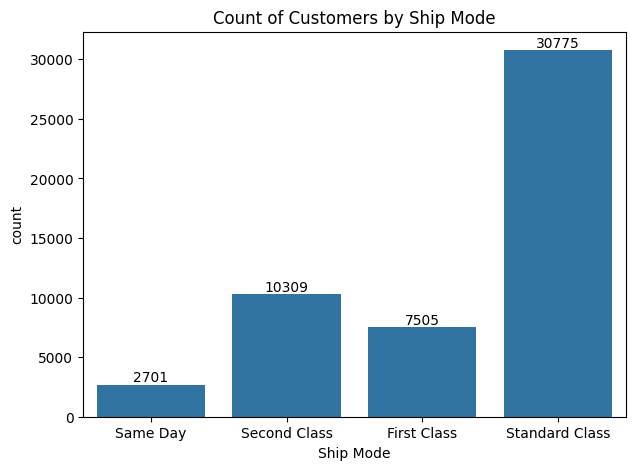

In [30]:
plt.figure(figsize = (7,5))
ax = sns.countplot(x = "Ship Mode" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Ship Mode")
plt.show()

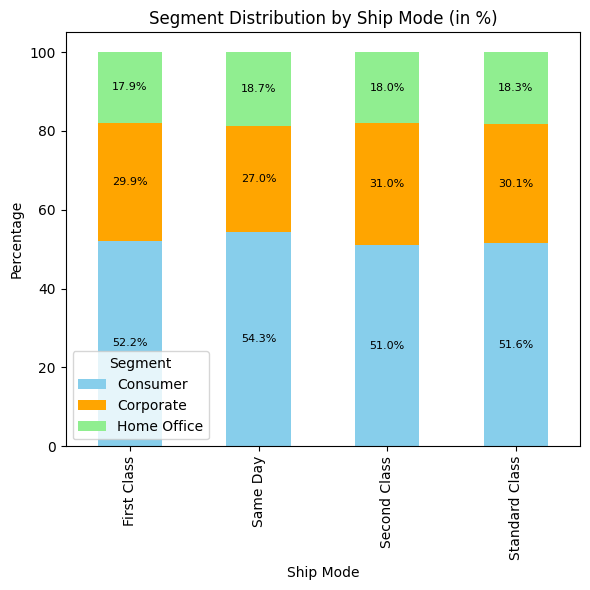

<Figure size 400x400 with 0 Axes>

In [26]:
df = pd.read_csv("E:/project EDA/Global_Superstore2.csv", encoding='ISO-8859-1')

crosstab = pd.crosstab(df['Ship Mode'], df['Segment'])

percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

colors = ['skyblue', 'orange', 'lightgreen'] 
ax = percentages.plot(kind='bar', stacked=True, figsize=(6,6), color=colors)

for i, mode in enumerate(percentages.index):
    y_offset = 0
    for segment in percentages.columns:
        value = percentages.loc[mode, segment]
        if value > 0:
            ax.text(i, y_offset + value/2, f"{value:.1f}%", ha='center', va='center', fontsize=8)
            y_offset += value

plt.title("Segment Distribution by Ship Mode (in %)")
plt.ylabel("Percentage")
plt.xlabel("Ship Mode")
plt.legend(title="Segment")
plt.tight_layout(),
plt.figure(figsize = (4,4))
plt.show()

#Comparative a greated pecentage of people in ship mode category have segment

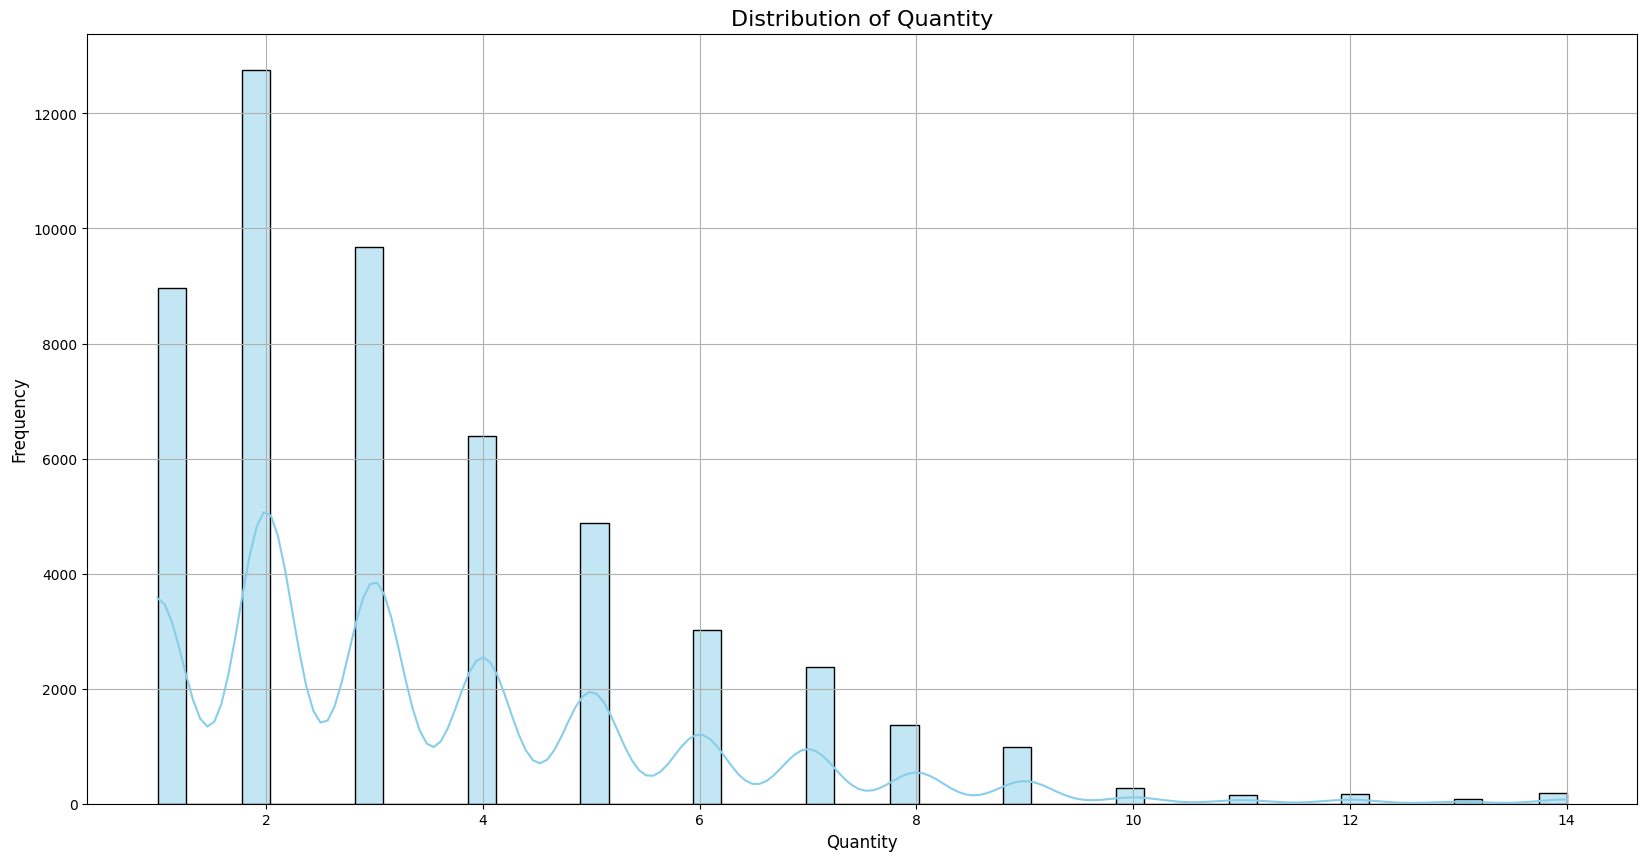

In [17]:
df = pd.read_csv("E:/project EDA/Global_Superstore2.csv", encoding='ISO-8859-1')

plt.figure(figsize=(20,10))
sns.histplot(x="Quantity", data=df, bins=50, color="skyblue", kde=True)
plt.title("Distribution of Quantity", fontsize=16)
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


#Histogram Showing Distribution of Sold Quantities Across All Transactions

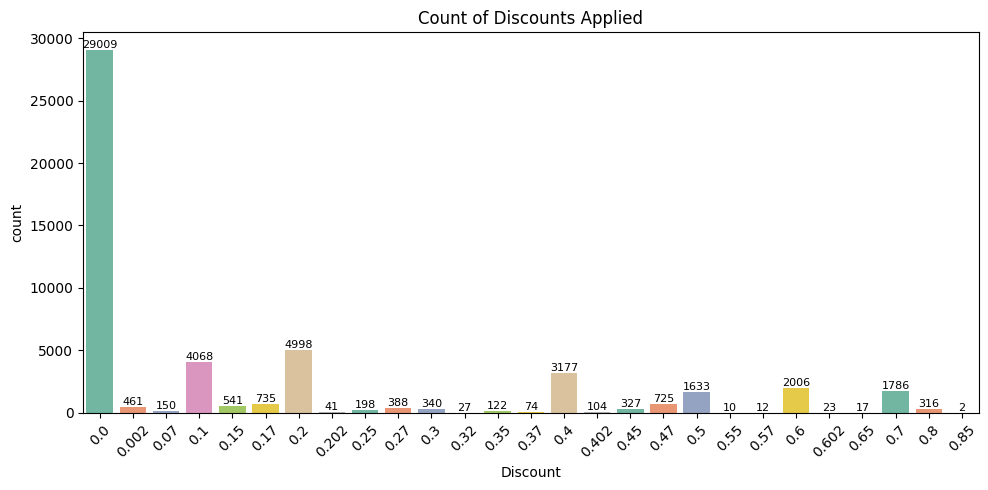

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Discount", data=df, hue="Discount", palette="Set2", legend=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.title("Count of Discounts Applied")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Distribution of Discounts Across Orders

In [27]:
 df.columns.values

array(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Postal Code', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype=object)

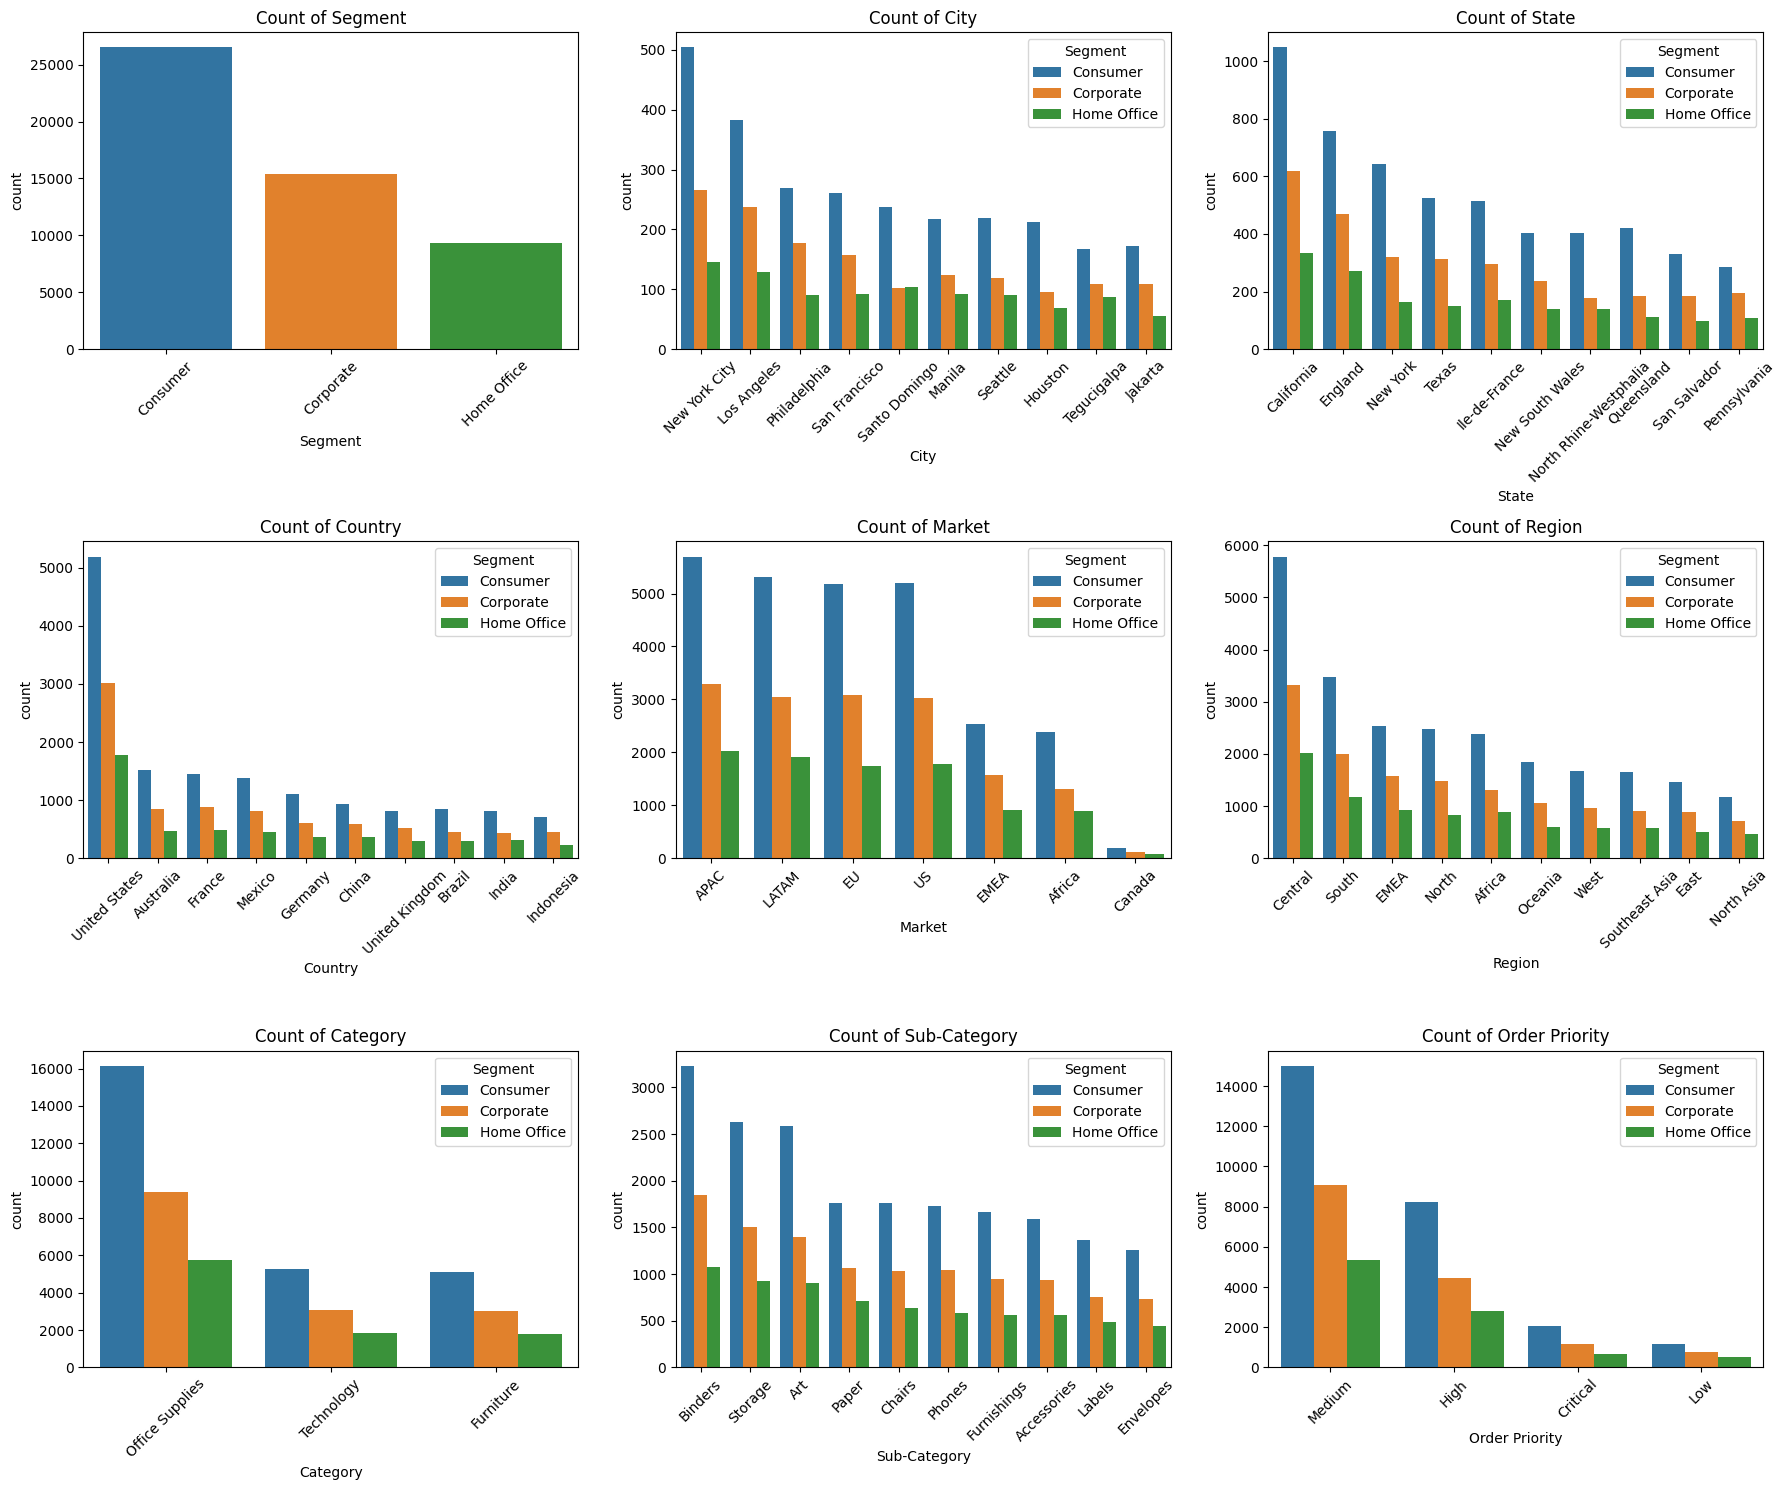

In [32]:
categorical_columns = ['Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']

num_plots = len(categorical_columns)
cols = 3
rows = (num_plots + cols - 1) // cols  # ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index[:10], hue = df["Segment"])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#🔹 Consumer segment dominates across all categories, especially in the U.S. and major cities like New York and Los Angeles.

#🔹 United States, APAC, and EU markets have the highest number of orders, with Office Supplies being the most frequently purchased category.

#🔹 The South and Central regions show the highest activity, with Medium priority orders being the most common.

#🔹 There's a clear distribution imbalance where a few top cities and countries account for the majority of orders.